In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("Dry_Bean.csv")
print(df.columns)
df.head()

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
#Checking various information about the data
print(df['Class'].unique())
print(len(df['Class'].unique()))
print(len(df))

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
7
13611


In [9]:
print(df.isna().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [14]:
X = df.drop(columns = ['Class'])
y = df['Class']

In [16]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [17]:
# scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

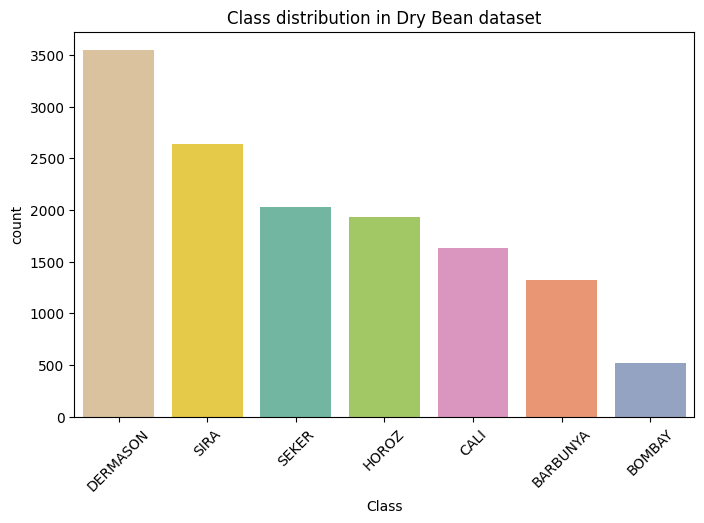

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x=y, order=y.value_counts().index, palette="Set2", hue =y, legend = False)
plt.title("Class distribution in Dry Bean dataset")
plt.xticks(rotation=45)
plt.show()

In [21]:
# PCA (retain 99% variance)
pca = PCA(n_components=0.99, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count after PCA: {X_train_pca.shape[1]}")

Original feature count: 16
Reduced feature count after PCA: 7


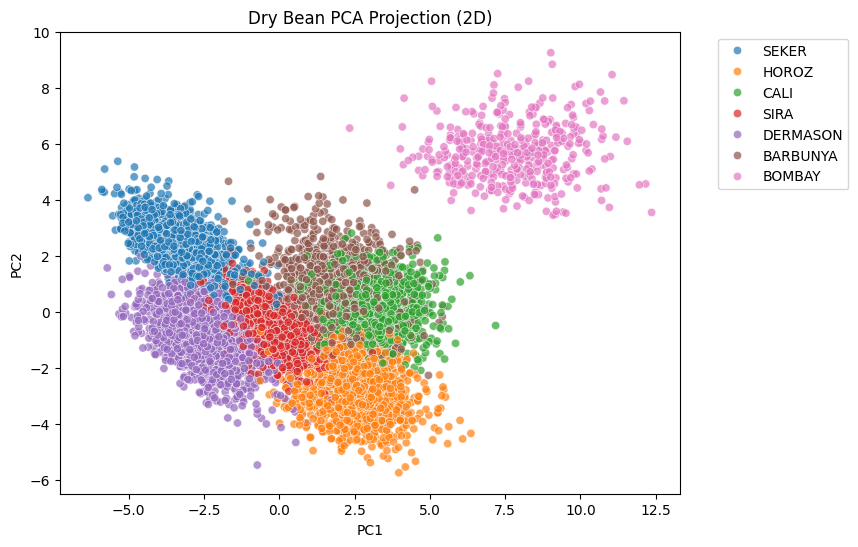

In [36]:
#Visualising the distribution of the daat by using the 2 top PCA features
pca2 = PCA(n_components=2)
X_pca_2d = pca2.fit_transform(X_train_scaled)
X_pca_2d_test = pca.transform(X_test_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=y_train, palette="tab10", alpha=0.7)
plt.title("Dry Bean PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [23]:
# Training SVM with RBF kernel on PCA features
svm_rbf = SVC(kernel="rbf", C=10, gamma="scale", random_state=42)
svm_rbf.fit(X_train_pca, y_train)

SVC(C=10, random_state=42)

In [24]:
# Evaluation and Quantifying the results
y_pred = svm_rbf.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9243481454278369

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.91      0.92      0.92       709
       HOROZ       0.96      0.96      0.96       386
       SEKER       0.94      0.95      0.95       406
        SIRA       0.87      0.86      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723



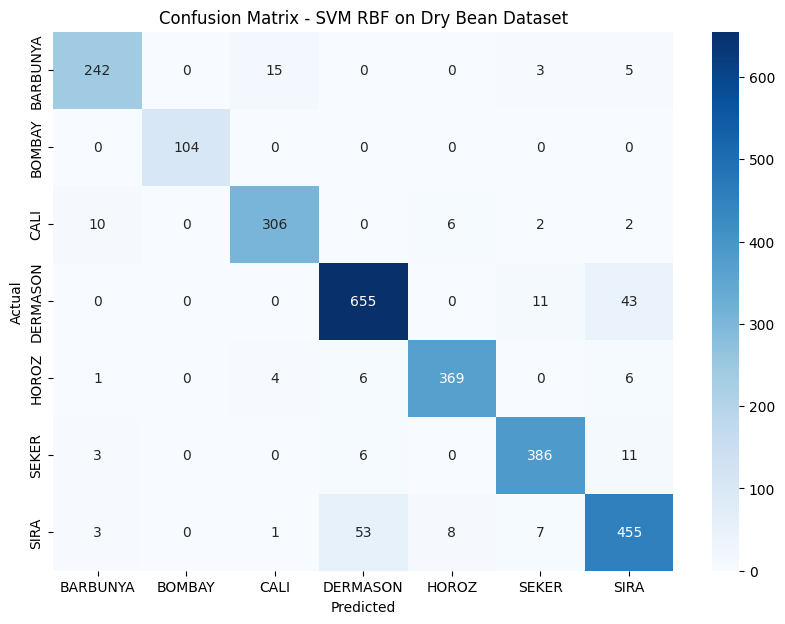

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=svm_rbf.classes_)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=svm_rbf.classes_,
            yticklabels=svm_rbf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM RBF on Dry Bean Dataset")
plt.show()


In [30]:
#precision and recall

from sklearn.metrics import precision_score, recall_score

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)
print("Weighted Precision:", precision_weighted)
print("Weighted Recall:", recall_weighted)


Macro Precision: 0.9373706756116549
Macro Recall: 0.935109902540867
Weighted Precision: 0.9243542101695529
Weighted Recall: 0.9243481454278369


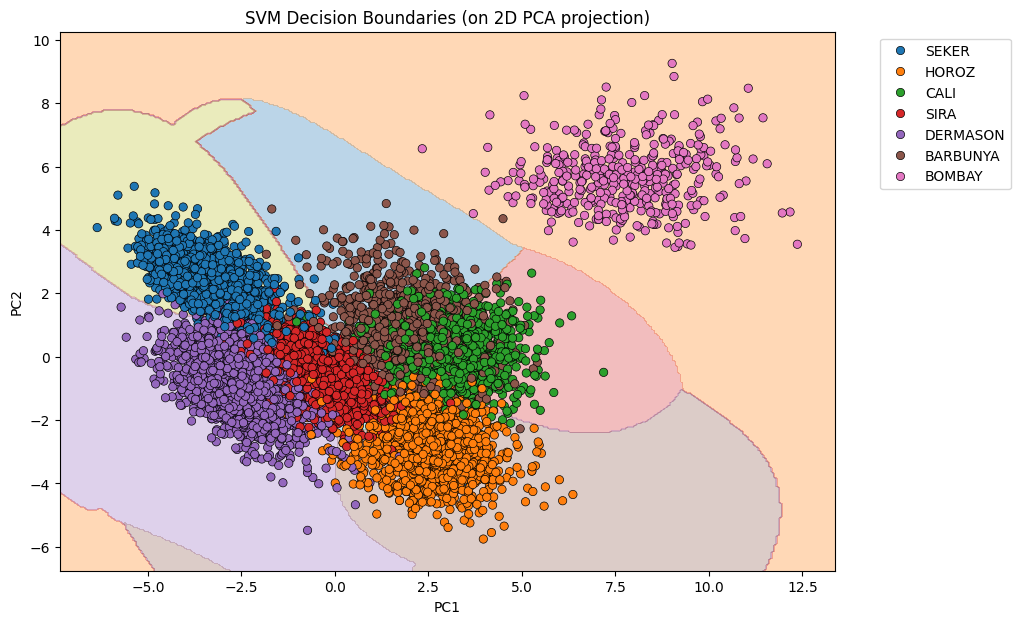

In [38]:
#Visualising SVM's decision boundary by keeping just 2 feature from pca

from sklearn.preprocessing import LabelEncoder

# Encode class labels to integers for visualization)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

svm_vis = SVC(kernel="rbf", C=10, gamma="scale")
svm_vis.fit(X_pca_2d, y_train_enc)

# Meshgrid
x_min, x_max = X_pca_2d[:,0].min() - 1, X_pca_2d[:,0].max() + 1
y_min, y_max = X_pca_2d[:,1].min() - 1, X_pca_2d[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="tab10")

sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=y_train, palette="tab10", edgecolor="k")
plt.title("SVM Decision Boundaries (on 2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
